In [1]:
!python -V

Python 3.11.7


In [64]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from mlflow import MlflowClient
from mlflow.entities import ViewType
from pprint import pprint

TRACKING_URI = "sqlite:///mlflow.db"

## Q1. Install MLflow

In [61]:
!mlflow --version

mlflow, version 2.13.0


In [11]:
!pwd

/workspaces/mlops-zoomcamp/02-experiment-tracking


In [12]:
!mkdir data

In [13]:
!ls

data  homework_2.ipynb	mlflow.db  mlruns


In [27]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet

--2024-05-27 13:34:50--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.32.192.116, 13.32.192.190, 13.32.192.124, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.32.192.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1427002 (1.4M) [binary/octet-stream]
Saving to: ‘green_tripdata_2023-01.parquet’

green_tripdata_2023 100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2024-05-27 13:34:50 (45.4 MB/s) - ‘green_tripdata_2023-01.parquet’ saved [1427002/1427002]

--2024-05-27 13:34:50--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.32.192.124, 13.32.192.116, 13.32.192.190, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.32.192.124|:443... connected.
HTTP request sen

In [28]:
!ls

data				green_tripdata_2023-03.parquet	mlruns
green_tripdata_2023-01.parquet	homework_2.ipynb
green_tripdata_2023-02.parquet	mlflow.db


In [31]:
! mv green_tripdata_2023-01.parquet data/
! mv green_tripdata_2023-02.parquet data/
! mv green_tripdata_2023-03.parquet data/

In [35]:
!ls -l data/

total 4588
-rw-rw-rw- 1 codespace codespace 1427002 Mar 20  2023 green_tripdata_2023-01.parquet
-rw-rw-rw- 1 codespace codespace 1533740 May  1  2023 green_tripdata_2023-02.parquet
-rw-rw-rw- 1 codespace codespace 1730999 May 19  2023 green_tripdata_2023-03.parquet


In [55]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/preprocess_data.py
!ls -l

--2024-05-27 14:05:50--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/preprocess_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2510 (2.5K) [text/plain]
Saving to: ‘preprocess_data.py’

preprocess_data.py  100%[===================>]   2.45K  --.-KB/s    in 0s      

2024-05-27 14:05:50 (48.4 MB/s) - ‘preprocess_data.py’ saved [2510/2510]

total 292
drwxrwxrwx+ 2 codespace codespace   4096 May 27 13:36 data
-rw-rw-rw-  1 codespace codespace  60760 May 27 14:05 homework_2.ipynb
-rw-r--r--  1 codespace codespace 217088 May 24 14:43 mlflow.db
drwxrwxrwx+ 2 codespace codespace   4096 May 24 14:14 mlruns
drwxrwxrwx+ 2 codespace codespace   4096 May 27 13:59 output
-rw-rw-rw-  1 codespace 

In [49]:
!python preprocess_data.py --raw_data_path data --dest_path ./output

In [53]:
!ls -l output

total 7016
-rw-rw-rw- 1 codespace codespace  131004 May 27 13:59 dv.pkl
-rw-rw-rw- 1 codespace codespace 2458697 May 27 13:59 test.pkl
-rw-rw-rw- 1 codespace codespace 2374517 May 27 13:59 train.pkl
-rw-rw-rw- 1 codespace codespace 2215823 May 27 13:59 val.pkl


In [56]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/train.py
!ls -l

--2024-05-27 14:06:01--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 790 [text/plain]
Saving to: ‘train.py’

train.py            100%[===================>]     790  --.-KB/s    in 0s      

2024-05-27 14:06:01 (90.7 MB/s) - ‘train.py’ saved [790/790]

total 296
drwxrwxrwx+ 2 codespace codespace   4096 May 27 13:36 data
-rw-rw-rw-  1 codespace codespace  60760 May 27 14:05 homework_2.ipynb
-rw-r--r--  1 codespace codespace 217088 May 24 14:43 mlflow.db
drwxrwxrwx+ 2 codespace codespace   4096 May 24 14:14 mlruns
drwxrwxrwx+ 2 codespace codespace   4096 May 27 13:59 output
-rw-rw-rw-  1 codespace codespace   2510 May 27 14:05 preprocess

In [58]:
!python train.py

2024/05/27 14:19:46 INFO mlflow.tracking.fluent: Experiment with name 'homework_2' does not exist. Creating a new experiment.
2024/05/27 14:19:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/05/27 14:19:47 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/27 14:20:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/codespace/anaconda3/envs/mlops_2024/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."
/home/codespace/anaconda3/envs/mlops_2024/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean 

In [ ]:
!mlflow ui --backend-store-uri "sqlite:///mlflow.db" --port 5051

In [69]:
client = MlflowClient(tracking_uri=TRACKING_URI)

all_experiments = client.search_experiments()

for experiments in all_experiments:
    print(experiments, end="\n\n")


<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/2', creation_time=1716819586961, experiment_id='2', last_update_time=1716819586961, lifecycle_stage='active', name='homework_2', tags={}>

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/1', creation_time=1716560072541, experiment_id='1', last_update_time=1716560072541, lifecycle_stage='active', name='mi_primer_experimento', tags={}>

<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1716559766688, experiment_id='0', last_update_time=1716559766688, lifecycle_stage='active', name='Default', tags={}>



In [79]:
runs = client.search_runs(
    experiment_ids='2',
    filter_string="",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=5,
    #order_by=["metrics.training_root_mean_squared_error ASC"]
)

for run in runs:
    print(run)

<Run: data=<RunData: metrics={'training_mean_absolute_error': 3.4244701942312354,
 'training_mean_squared_error': 27.083054499499358,
 'training_r2_score': 0.6673983775155525,
 'training_root_mean_squared_error': 5.204138209108148,
 'training_score': 0.6673983775155525}, params={'bootstrap': 'True',
 'ccp_alpha': '0.0',
 'criterion': 'squared_error',
 'max_depth': '10',
 'max_features': '1.0',
 'max_leaf_nodes': 'None',
 'max_samples': 'None',
 'min_impurity_decrease': '0.0',
 'min_samples_leaf': '1',
 'min_samples_split': '2',
 'min_weight_fraction_leaf': '0.0',
 'monotonic_cst': 'None',
 'n_estimators': '100',
 'n_jobs': 'None',
 'oob_score': 'False',
 'random_state': '0',
 'verbose': '0',
 'warm_start': 'False'}, tags={'estimator_class': 'sklearn.ensemble._forest.RandomForestRegressor',
 'estimator_name': 'RandomForestRegressor',
 'mlflow.log-model.history': '[{"run_id": "179c5e79001944b69ec5508f4a926d2a", '
                             '"artifact_path": "model", "utc_time_created":

In [82]:
for run in runs:
    print(f"run id: {run.info.run_id}, rmse: {run.data.metrics['training_root_mean_squared_error']:.4f}, min_samples_split: {run.data.params['min_samples_split']}")

run id: 179c5e79001944b69ec5508f4a926d2a, rmse: 5.2041, min_samples_split: 2


## Q4. Launch the tracking server locally

In [88]:
!pwd

/workspaces/mlops-zoomcamp/02-experiment-tracking


In [86]:
!mlflow ui --backend-store-uri "sqlite:///mlflow.db" --default-artifact-root "./artifacts" --port 5051

[2024-05-27 15:23:00 +0000] [58622] [INFO] Starting gunicorn 22.0.0
[2024-05-27 15:23:00 +0000] [58622] [INFO] Listening at: http://127.0.0.1:5051 (58622)
[2024-05-27 15:23:00 +0000] [58622] [INFO] Using worker: sync
[2024-05-27 15:23:00 +0000] [58623] [INFO] Booting worker with pid: 58623
[2024-05-27 15:23:00 +0000] [58624] [INFO] Booting worker with pid: 58624
[2024-05-27 15:23:00 +0000] [58625] [INFO] Booting worker with pid: 58625
[2024-05-27 15:23:00 +0000] [58626] [INFO] Booting worker with pid: 58626
^C
[2024-05-27 15:27:35 +0000] [58622] [INFO] Handling signal: int
[2024-05-27 15:27:35 +0000] [58623] [INFO] Worker exiting (pid: 58623)
[2024-05-27 15:27:35 +0000] [58624] [INFO] Worker exiting (pid: 58624)
[2024-05-27 15:27:35 +0000] [58626] [INFO] Worker exiting (pid: 58626)
[2024-05-27 15:27:35 +0000] [58625] [INFO] Worker exiting (pid: 58625)


## Q5. Tune model hyperparameters

In [89]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/hpo.py
!ls -l

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
--2024-05-27 15:33:35--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/hpo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1841 (1.8K) [text/plain]
Saving to: ‘hpo.py’

hpo.py              100%[===================>]   1.80K  --.-KB/s    in 0s      

2024-05-27 15:33:35 (17.3 MB/s) - ‘hpo.py’ saved [1841/1841]

total 316
drwxrwxrwx+ 2 codespace codespace   4096 May 27 15:22 artifacts
drwxrwxrwx+ 2 codespace codespace   4096 May 27 13:36 data
-rw-rw-rw-  1 codespace codespace  71441 May 27 15:32 homework_2.ipynb
-rw-rw-rw-  1 codespace code

In [90]:
!python hpo.py

2024/05/27 15:51:30 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.
  0%|                                    | 0/15 [00:00<?, ?trial/s, best loss=?]/home/codespace/anaconda3/envs/mlops_2024/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

  7%|▋          | 1/15 [00:07<01:49,  7.82s/trial, best loss: 5.370086069268862]/home/codespace/anaconda3/envs/mlops_2024/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

 13%|█▍         | 2/15 [00:08<00:45,  3.47s/trial, best loss: 5.370086069268862]/home/codespace/anaconda3/envs/mlops_2

In [91]:
client = MlflowClient(tracking_uri=TRACKING_URI)

all_experiments = client.search_experiments()

for experiments in all_experiments:
    print(experiments, end="\n\n")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/3', creation_time=1716825090518, experiment_id='3', last_update_time=1716825090518, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/2', creation_time=1716819586961, experiment_id='2', last_update_time=1716819586961, lifecycle_stage='active', name='homework_2', tags={}>

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/1', creation_time=1716560072541, experiment_id='1', last_update_time=1716560072541, lifecycle_stage='active', name='mi_primer_experimento', tags={}>

<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1716559766688, experiment_id='0', last_update_time=1716559766688, lifecycle_stage='active', name='Default', tags={}>



In [112]:
runs = client.search_runs(
    experiment_ids='3',
    filter_string="",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=10,
    order_by=["metrics.rmse ASC"]
)

In [115]:
for run in runs:
    print(f"run id: {run.info.run_id}, run name: {run.info.run_name}\n\trmse: {run.data.metrics['rmse']:.4f}\n\tparams: {run.data.params}", end="\n\n")

run id: 606da110763c44398871b191551c11f2, run name: efficient-doe-656
	rmse: 5.3354
	params: {'max_depth': '19', 'min_samples_leaf': '2', 'min_samples_split': '2', 'n_estimators': '11', 'random_state': '42'}

run id: 635da6b0c6414f3ea6881223802937a4, run name: grandiose-zebra-58
	rmse: 5.3547
	params: {'max_depth': '15', 'min_samples_leaf': '2', 'min_samples_split': '3', 'n_estimators': '40', 'random_state': '42'}

run id: 102233c7278f4daab12ac3ce9286b13f, run name: amazing-roo-106
	rmse: 5.3550
	params: {'max_depth': '20', 'min_samples_leaf': '1', 'min_samples_split': '9', 'n_estimators': '19', 'random_state': '42'}

run id: faf53ce92f8b4d08878368fb99ed79cd, run name: clean-mouse-735
	rmse: 5.3575
	params: {'max_depth': '14', 'min_samples_leaf': '3', 'min_samples_split': '4', 'n_estimators': '26', 'random_state': '42'}



## Q6. Promote the best model to the model registry

In [116]:
!wget https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/register_model.py
!ls -l

--2024-05-27 16:31:28--  https://raw.githubusercontent.com/DataTalksClub/mlops-zoomcamp/main/cohorts/2024/02-experiment-tracking/homework/register_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2502 (2.4K) [text/plain]
Saving to: ‘register_model.py’

register_model.py   100%[===================>]   2.44K  --.-KB/s    in 0s      

2024-05-27 16:31:28 (56.6 MB/s) - ‘register_model.py’ saved [2502/2502]

total 364
drwxrwxrwx+ 2 codespace codespace   4096 May 27 15:22 artifacts
drwxrwxrwx+ 2 codespace codespace   4096 May 27 13:36 data
-rw-rw-rw-  1 codespace codespace  84070 May 27 16:30 homework_2.ipynb
-rw-rw-rw-  1 codespace codespace   1999 May 27 15:46 hpo.py
-rw-r--r--  1 codespace codespace 249856 May 27 15:52 mlflow.db
drwxrwxrwx+ 4 codespace 

In [120]:
!python register_model.py

2024/05/27 16:55:27 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-best-models' does not exist. Creating a new experiment.
2024/05/27 16:55:27 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/05/27 16:55:28 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/27 16:55:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/codespace/anaconda3/envs/mlops_2024/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."
/home/codespace/anaconda3/envs/mlops_2024/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate

In [157]:
model_name = 'ml_regressor_green_taxi_trip'
versions = client.search_model_versions(f"name='{model_name}'")
for version in versions:
    print(f"version: {version.version}, stage: {version.current_stage}, run id {rund_id}")

version: 1, stage: None, run id 20141bf780b94f8f99ef14e8c69dc80f


In [154]:
client = MlflowClient(tracking_uri=TRACKING_URI)

all_experiments = client.search_experiments()

for experiments in all_experiments:
    print(experiments, end="\n\n")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/4', creation_time=1716828927375, experiment_id='4', last_update_time=1716828927375, lifecycle_stage='active', name='random-forest-best-models', tags={}>

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/3', creation_time=1716825090518, experiment_id='3', last_update_time=1716825090518, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/2', creation_time=1716819586961, experiment_id='2', last_update_time=1716819586961, lifecycle_stage='active', name='homework_2', tags={}>

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/02-experiment-tracking/mlruns/1', creation_time=1716560072541, experiment_id='1', last_update_time=1716560072541, lifecycle_stage='active', name='mi_primer_experimento', tags={}>

<Experiment: artifact_location='mlflow-artifacts:/

In [158]:
best_runs = client.search_runs(
    experiment_ids='4',
    filter_string="",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=5,
    order_by=["metrics.test_rmse ASC"]
)

for run in best_runs:
    print(f"test_rmse: {run.data.metrics['test_rmse']:.4f}, run id: {run.info.run_id}, run name: {run.info.run_name}")

test_rmse: 5.5674, run id: 20141bf780b94f8f99ef14e8c69dc80f, run name: smiling-moose-868
test_rmse: 5.5853, run id: 9b45773098e64ea58921a21f982974b8, run name: auspicious-stoat-233
test_rmse: 5.5895, run id: 1726b9be76c6455bbfe8a912d45bd47b, run name: sedate-stoat-717
test_rmse: 5.5921, run id: 3de5fb497f974fdd97259aea27da07d3, run name: sedate-owl-350
test_rmse: 5.5942, run id: 38aeed5818254efc9b72c15bcdb5da04, run name: traveling-koi-127


In [ ]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("mi_primer_experimento")

In [16]:
df_202301 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [17]:
df_202301.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [18]:
print(df_202301.columns)
len(df_202301.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


19

In [19]:
df = df_202301.copy()
del df_202301

df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df.duration.std()

42.59435124195458

In [20]:
df_total = df.shape[0]
df = df[(df.duration >= 1) & (df.duration <= 60)]
df.shape[0] / df_total 

0.9812202822125979

In [21]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train.shape[1]

515

In [22]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

/home/codespace/anaconda3/envs/mlops_2024/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.649262236295703

/tmp/ipykernel_29325/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_29325/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


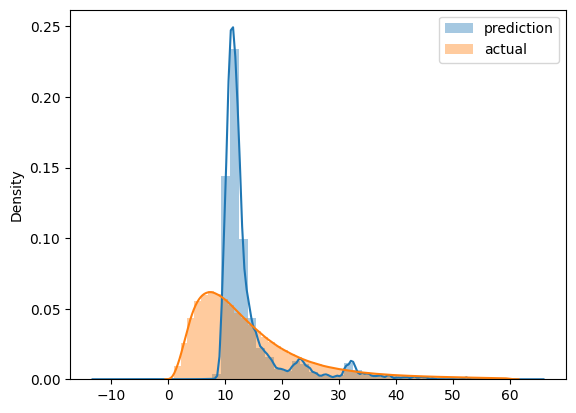

In [23]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [24]:
def read_dataframe(filename, ist_df = False):

    if not ist_df:
        if filename.endswith('.csv'):
            df = pd.read_csv(filename)
    
            df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
            df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
        elif filename.endswith('.parquet'):
            df = pd.read_parquet(filename)
    else:
        df = filename
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [25]:
df_train = df[categorical]
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [26]:
len(df_train), len(df_val)

(3009173, 2855951)

In [27]:
#df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
#df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [28]:
categorical = ['PULocationID', 'DOLocationID'] #['PU_DO']
#dv = DictVectorizer()

#train_dicts = df_train[categorical].to_dict(orient='records')
#X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [36]:
target = 'duration'
y_train = df[target].values #df_train[target].values
y_val = df_val[target].values

In [40]:
with mlflow.start_run() as run:

    mlflow.set_tag("developer", "jesusoviedo")

    mlflow.log_param("train_data_uri", "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
    mlflow.log_param("valid_data_uri", "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

    mlflow.log_param("alpha","1")
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_val)
    
    rmse = root_mean_squared_error(y_val, y_pred)
    mlflow.log_metric("root_mean_squared_error", rmse)